# **Gurobi 3: Carga de Datos desde Archivos Externos y Aplicación en un Problema de Transporte**

## **Introducción**  
En esta práctica aprenderás a cargar datos desde archivos externos **CSV y Excel**, y a utilizarlos en un **problema de transporte** resuelto con **Gurobi**.

### **¿Por qué cargar datos desde archivos externos?**  
✅ Permite manejar grandes volúmenes de datos sin ingresarlos manualmente.  
✅ Facilita la actualización de modelos sin modificar el código fuente.  
✅ Mejora la integración con bases de datos y sistemas empresariales.  

### **📌 Caso de estudio: Optimización del transporte**  
Una empresa tiene **tres plantas** que producen bienes y deben enviarlos a **tres centros de distribución**. Queremos minimizar los costos de transporte mientras cumplimos con las restricciones de capacidad y demanda.

---
    

## **Paso 1: Instalación y Configuración de Librerías**

In [ ]:

# Instalar Pandas para trabajar con archivos CSV y Excel
!pip install pandas openpyxl

# Importar librerías necesarias
import pandas as pd

print("Librerías instaladas y listas para usarse.")

In [ ]:
# Descargar e instalar Gurobi desde la fuente oficial
!add-apt-repository -y ppa:deadsnakes/ppa
!apt-get update
!apt-get install -y python3.10
!pip install -i https://pypi.gurobi.com gurobipy


In [ ]:
!pip install gurobipy

# Importar la biblioteca
import gurobipy as gp
from gurobipy import GRB

print("Gurobi instalado y listo para usarse.")


## **Paso 2: Comprender los Formatos de Datos CSV y Excel**  

📌 **Formato CSV (Comma-Separated Values)**:  
- Es un archivo de texto donde los valores están separados por comas (,).  
- Se puede abrir en Excel o en cualquier editor de texto.  

📌 **Formato Excel (.xlsx)**:  
- Permite almacenar datos en hojas de cálculo con múltiples pestañas.  
- Es útil cuando se trabaja con datos más complejos que requieren formatos especiales.  

Ejemplo de datos en **CSV** y **Excel** que usaremos en esta práctica:

| Origen   | Destino   | Costo | Capacidad |
|----------|----------|-------|-----------|
| Planta_1 | Centro_A | 10    | 100       |
| Planta_1 | Centro_B | 15    | 80        |
| Planta_1 | Centro_C | 20    | 60        |
| Planta_2 | Centro_A | 25    | 90        |
| Planta_2 | Centro_B | 30    | 70        |
| Planta_2 | Centro_C | 35    | 50        |
| Planta_3 | Centro_A | 12    | 110       |
| Planta_3 | Centro_B | 18    | 85        |
| Planta_3 | Centro_C | 22    | 75        |

---
    

## **Paso 3: Carga de Datos desde un Archivo CSV y Excel**

Los archivos se cargan el icono de carpeta en el menú del lado izquierdo:

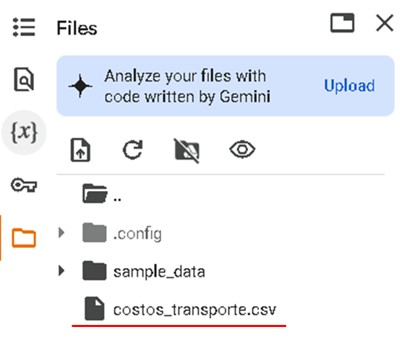

In [ ]:
# Cargar datos desde CSV
df_csv = pd.read_csv("transporte_costos.csv")
print("Datos cargados desde el archivo CSV:")
print(df_csv)

In [ ]:
# Cargar datos desde Excel
df_excel = pd.read_excel("transporte_costos.xlsx", sheet_name="Datos")
print("Datos cargados desde el archivo Excel:")
print(df_excel)


## **Paso 4: Definir el Modelo de Optimización en Gurobi**

In [ ]:

# Definir oferta y demanda (negativos representan oferta, positivos demanda)
demanda_transporte = {'Planta_1': -150, 'Planta_2': -120, 'Planta_3': -130,
                      'Centro_A': 140, 'Centro_B': 110, 'Centro_C': 150}

# Crear el modelo de optimización
modelo = gp.Model("Optimización_Transporte")

# Crear variables de decisión para cada ruta (cantidad a transportar)
rutas = {}
for i, row in df_csv.iterrows():
    rutas[(row['Origen'], row['Destino'])] = modelo.addVar(
        name=f"{row['Origen']}_{row['Destino']}",
        vtype=GRB.CONTINUOUS, lb=0, ub=row['Capacidad']
    )

# Definir función objetivo (minimizar costos de transporte)
modelo.setObjective(
    gp.quicksum(rutas[(row['Origen'], row['Destino'])] * row['Costo'] for i, row in df_csv.iterrows()),
    GRB.MINIMIZE
)

# Crear restricciones de balance de flujo para cada nodo
nodos = set(df_csv['Origen']).union(set(df_csv['Destino']))

for nodo in nodos:
    flujo_entrada = gp.quicksum(rutas[(o, d)] for o, d in rutas.keys() if d == nodo)
    flujo_salida = gp.quicksum(rutas[(o, d)] for o, d in rutas.keys() if o == nodo)

    # Restricción de balance de flujo considerando la oferta/demanda
    if nodo in demanda_transporte:
        modelo.addConstr(flujo_entrada - flujo_salida == demanda_transporte[nodo], name=f"Balance_{nodo}")
    else:
        modelo.addConstr(flujo_entrada - flujo_salida == 0, name=f"Balance_{nodo}")

# Resolver el modelo
modelo.optimize()

# Mostrar resultados
resultado = []
if modelo.status == GRB.OPTIMAL:
    print("Solución óptima encontrada:")
    for key, var in rutas.items():
        if var.x > 0:  # Solo mostrar rutas con transporte positivo
            resultado.append((key[0], key[1], var.x))
            print(f"Transporte de {key[0]} a {key[1]}: {var.x} unidades")
    print(f"Costo mínimo total: {modelo.objVal}")
else:
    print("No se encontró una solución óptima.")



## **Ejercicios para el Alumno**  
Ahora que has aprendido a cargar datos desde archivos externos y usarlos en un modelo de optimización, completa los siguientes ejercicios:  

1. **Modifica los datos del archivo CSV o Excel** para agregar una nueva planta con rutas y costos.  
2. **Cambia la función objetivo** para maximizar en lugar de minimizar.  
3. **Añade una restricción** que limite el transporte total a un centro de distribución.  
4. **Explica cómo cambiaría el modelo si agregamos más restricciones logísticas.**  

✍️ **Instrucciones:**  
- Edita los archivos CSV o Excel y recarga los datos en el modelo.  
- Modifica el código del modelo de optimización para reflejar los cambios.  
- Ejecuta el modelo y analiza los resultados obtenidos.  
    